In [62]:
import cv2
import numpy as np
import pandas as pd

In [63]:
vid = cv2.VideoCapture("PPGsample1.mp4")
fps = vid.get(5)

In [64]:
def readFromFile(fileName):
    colors =np.loadtxt(fileName)
    return colors[0], colors[1], colors[2]

In [65]:
#will return a list of the indexes of the peaks
def peakList(colorList, frameThreshold):
    peaks = []
    for i in range(1,len(colorList)-1):
        #check to see if greater than immediate surroundings
        if colorList[i-1] <  colorList[i]  and colorList[i+1] <  colorList[i]:
            #if so, check every other frame in the threshold
            for j in range(2, frameThreshold):
                #check everything in threshold before - will break if not a peak
                if i-j>0:
                    if colorList[i]<colorList[i-j]:
                        break
                #check everything in threshold after
                if i+j<len(colorList):
                    if colorList[i]<colorList[i+j]:
                        break
            else:
                peaks.append(i)
    return peaks

In [66]:
r,g,b = readFromFile("color-values-PPG1.txt")

In [67]:
def rrList(peakIndexes):
    rrlist = [];
    for i in range(1,len(peakIndexes)):
        rr = (peakIndexes[i]-peakIndexes[i-1])*1/fps
        rrlist.append(rr)
    return rrlist

In [68]:
def timeList(rrList):
    times = [rrList[0]]
    for i in range(1,len(rrList)):
        times.append(times[i-1]+rrList[i])
    return times

In [69]:
redRRList = rrList(peakList(r,9))
redRR = pd.Series(redRRList,index = timeList(redRRList))

There are  32 peaks.


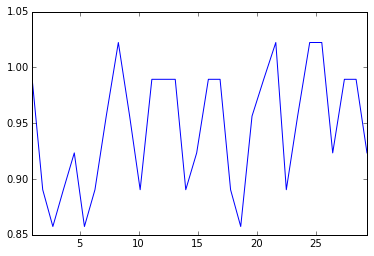

In [70]:
%matplotlib inline
print "There are ", str(len(peakList(r,9))), "peaks."
redRR.plot()

I tried to graph the red with the same threshold as green, but that made it miss a peak. I had to lower the threshold, but this shows that the data for red is not as robust as the green.

In [71]:
greenRRList = rrList(peakList(g,13))
greenRR = pd.Series(greenRRList,index = timeList(greenRRList))

There are  32 peaks.


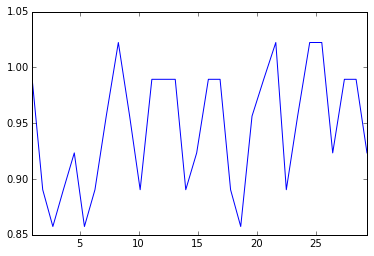

In [72]:
print "There are ", str(len(peakList(g,13))), "peaks."
greenRR.plot()

As you can see, when the threshold is adjusted, 